# 다중선형회귀분석

$\Large\begin{align}y = b + m_1 x_1 + m_2 x_2 + m_3 x_3 ... + m_n x_n\end{align}$

In [2]:
# 예제 데이터는 뉴욕 맨해튼의 주택 임대료와 관련한 테이블이다.
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/bfb3d87c4ccb4f55b47f3db8d690b392df96b0f3/streeteasy/manhattan.csv")
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


### 맨 왼쪽에 “rent”라는 항목이 있는데, 이게 주택의 임대료다. 이걸 예측하는 게 우리의 목표다. 
### 그 외의 항목들은 침실이 몇개 있는지, 지하철 역에서 몇 분 거리에 있는지, 엘리베이터가 있는지 등 주택에 대한 다양한 정보다. 
### 아래와 같이 총 14개의 정보가 있다.

['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']

In [3]:
from sklearn.model_selection import train_test_split

x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

y = df[['rent']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [4]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

### 이제 만약 내가 주택에 대한 14개 항목값 넣어주면 주택 임대료를 예측해준다.

In [5]:
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
my_predict = mlr.predict(my_apartment)

### 이제 x 시험 데이터 x_test를 넣어 예측한 y 값들을 y_predict라고 저장해보자. 추후에 시험 데이터에 있는 실제 정답, 즉 y_test와 비교해보기 위함이다.

In [38]:
y_predict  = mlr.predict(x_test)

### x축은 실제 임대료, y축은 예측한 임대료다. 만약 정답을 맞춘다면 정확히 선으로 일치되어 나올 거다.

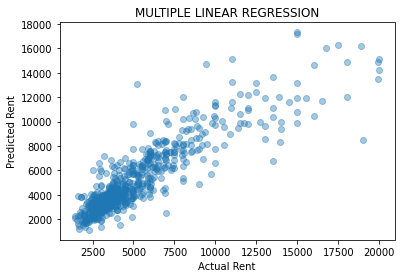

In [7]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

### 임대료가 낮은 항목들은 꽤 가깝게 맞추는데, 높은 임대료에서는 오차가 좀 있는 걸 알 수 있다. 그래도 어쨌든 얼추 잘 나오는 것 같다.

### 단순선형회귀는 우리가 직접 그릴 수 있는 1차 방정식 y = m*x + b으로 설명이 되기 때문에 m을 기울기, b를 절편이라고 불렀다.
### 그런데 다중회귀에서는 변수가 많기 때문에 조금 표현을 달리해야겠다. 일단 모든 변수 x마다 각각의 m이 있다. 그러니 이것들을 회귀계수라고 부르자. 그리고 b는 그냥 상수라고 부르자.

In [8]:
print(mlr.coef_)

[[-299.98566771 1195.87631278    4.85737336  -18.48293031   24.88816263
    -7.30567742 -138.65709103   37.26400637   99.16090273 -167.72281241
   128.82281398   -5.58412902 -162.38874676  -41.38755737]]


### 위 모델에서 총 14개의 변수를 사용했기 때문에 회귀계수도 당연히 14개가 존재한다.
### 그런데 이렇게 보면 대체 어떤 변수가 중요한 건지 감이 안 온다.

# 상관 살펴보기


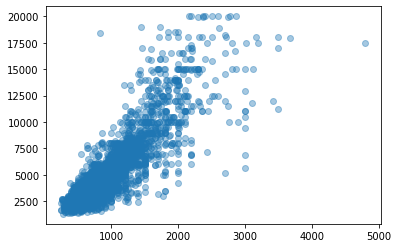

In [9]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()

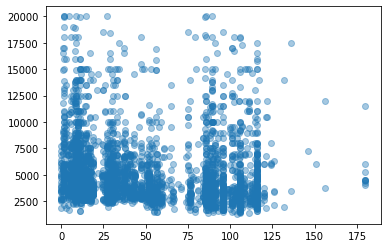

In [10]:
# 주택이 얼마나 오래 전에 지어졌는지 'building_age_yrs'와 가격 'rent'
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.show()

### 일단 이 두 개의 그림만 봐도 주택 면적은 상관이 있는데 얼마나 오래된 건물인지는 딱히 상관이 나타나지 않는 걸 알 수 있다.

# 모델의 정확도(Accuracy) 평가하기


### 다중선형회귀 모델의 정확도를 평가할 때는 잔차 분석(Analysis)을 하면 된다. 잔차는 실제 값 y와 예측된 값 ŷ의 차 e를 말한다. 방정식으로 표현하면 이렇게.

$\Large\begin{align} e=y-\hat{y} \end{align}$

### sklearn의 linear_model.LinearRegression를 사용해서 모델을 생성하면 .score()라는 메서드를 사용할 수 있는데 R²라고 하는 결정계수(coefficient of determination)를 돌려준다. 결정계수 R²은 이렇게 표현할 수 있다.

$\Large\begin{align} 1 - \frac{u}{v} \end{align}$

### 일단 분자에 있는 u는 잔차의 제곱의 평균 RSS(residual sum of square)는 직선이 미처 Y에 대해 설명할 수 있는 변화량을 의미한다.

In [39]:
((y_test-y_predict)**2).sum()

rent    1.506819e+09
dtype: float64

### 분모에 있는 v는 TSS(total sum of squares), y값의 총 변화량으로 이해하면 된다.

In [27]:
((y - y.mean()) ** 2).sum()

rent    3.539224e+10
dtype: float64

### 결국 결정계수 R²는 전체에서 직선이 미처 설명하지 못한 부분의 비율을 뺀 의미이다.

### 즉, 결정계수 R²가 클수록 실제값과 예측값이 유사함을 의미하며, 데이터를 잘 설명한다

In [28]:
print(mlr.score(x_train, y_train))

0.7754455169854799


### 주택 임대료의 77%를 저 14개의 항목으로 설명할 수 있다는 의미다.

### 즉, 0.7(=약70%) 정도면 양호한 것으로 간주한다.